In [1]:
import json 

with open('train/train.json', 'r') as f:
    train_pairs = json.load(f)
with open('test/test.json', 'r') as f:
    test_pairs = json.load(f)
print('Train data:', len(train_pairs))
print('Test data:', len(test_pairs))

Train data: 1000
Test data: 300


In [2]:
import torch
import torch.optim as optim
import torch.nn as nn

from trainer import Trainer
from model import EfficientNet

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
effi_l = EfficientNet('efficientnet_v2_l')
criterion = nn.MSELoss()
optimizer = optim.Adam(effi_l.parameters(), lr=0.002)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

trainer = Trainer(
    device=device, 
    model=effi_l, 
    model_name='efficientnet_v2_l', 
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler, 
    train_pairs=train_pairs, 
    image_path='train/image', 
    inference=False
)

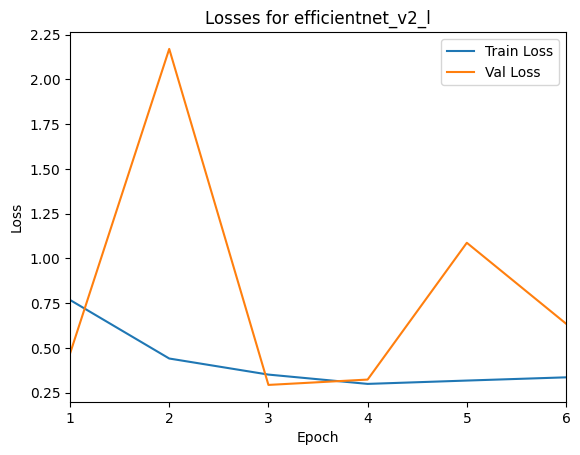

In [ ]:
# original window(min=-1000, max=400), not use Kfold
trainer.setup_datasets(use_kfold=False, transform=None)
trainer.train_and_eval(num_epochs=100, kfold=False)

In [ ]:
# original window(min=-1000, max=400), use Kfold
trainer.setup_datasets(use_kfold=True, n_splits=5, transform=None)
trainer.train_and_eval(num_epochs=100, kfold=True)

In [ ]:
# changed window(min=-135, max=215), not use Kfold
trainer.setup_datasets(use_kfold=False, transform='w')
trainer.train_and_eval(num_epochs=100, kfold=False)

In [ ]:
# changed window(min=-135, max=215), use Kfold
trainer.setup_datasets(use_kfold=True, n_splits=5, transform='w')
trainer.train_and_eval(num_epochs=100, kfold=True)